In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statistics
from subprocess import check_output;

/home/shaheer/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path1 = "Pokemon Datasets/pokemon_clean.csv"
path2 = "Pokemon Datasets/pokemon.csv"
path3 = "Pokemon Datasets/pokemon_clean_update.csv"

data  = pd.read_csv(path1)
all_data = pd.read_csv(path2)
update_data = pd.read_csv(path3)

In [4]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,hp,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,45,Bulbasaur,1,65,65,45,grass,poison,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,60,Ivysaur,2,80,80,60,grass,poison,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,Venusaur,3,122,120,80,grass,poison,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,39,Charmander,4,60,50,65,fire,NaN,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,58,Charmeleon,5,80,65,80,fire,NaN,1,0


In [5]:
data.dtypes

abilities            object
against_bug         float64
against_dark        float64
against_dragon      float64
against_electric    float64
against_fairy       float64
against_fight       float64
against_fire        float64
against_flying      float64
against_ghost       float64
against_grass       float64
against_ground      float64
against_ice         float64
against_normal      float64
against_poison      float64
against_psychic     float64
against_rock        float64
against_steel       float64
against_water       float64
attack                int64
defense               int64
hp                    int64
name                 object
pokedex_number        int64
sp_attack             int64
sp_defense            int64
speed                 int64
type1                object
type2                object
generation            int64
is_legendary          int64
dtype: object

In [6]:
missing_val = data.columns[data.isnull().any()].tolist()

In [7]:
for col in missing_val:
    print("%s : %d" % (col,all_data[col].nunique()))


type2 : 18


In [8]:
data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,against_water,attack,defense,hp,pokedex_number,sp_attack,sp_defense,speed,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.058365,77.857678,73.008739,68.958801,401.000000,71.305868,70.911361,66.334582,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,0.606562,32.158820,30.769159,26.576015,231.373075,32.353826,27.942501,28.907662,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.250000,5.000000,5.000000,1.000000,1.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.500000,55.000000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,75.000000,70.000000,65.000000,401.000000,65.000000,66.000000,65.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,100.000000,90.000000,80.000000,601.000000,91.000000,90.000000,85.000000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,185.000000,230.000000,255.000000,801.000000,194.000000,230.000000,180.000000,7.000000,1.000000


In [9]:
#baseStats = ('attack' + 'defense' + 'hp' + 'sp_attack' + 'sp_defense' + 'speed')
mod_attack = data['attack'] * 1.5
mod_sp_attack = data['sp_attack'] * 1.5
mod_speed = data['speed'] * 2

data['base_stats'] = data['attack'] + data['defense'] + data['hp'] + data['sp_attack'] + data['sp_defense'] + data['speed']
data['off_stats'] = data['attack'] + data['sp_attack'] + data['speed']  #Offensive stats, first hit and killing with that hit
data['def_stats'] = data['defense'] + data['hp'] + data['sp_defense'] #Defensive stats, surviving the hit
data['mod_stats'] = mod_attack + data['defense'] + data['hp'] + mod_sp_attack + data['sp_defense'] + mod_speed

print(data.loc[[2,5,8, 153, 156, 159, 253, 256, 259, 388, 391, 394, 496, 499, 502, 651, 654, 657, 723, 726, 729]])

df = data.loc[[2,5,8, 153, 156, 159, 253, 256, 259, 388, 391, 394, 496, 499, 502, 651, 654, 657, 723, 726, 729]] #pikachu is 24

generation_1 = data.iloc [0:151]
generation_2 = data.iloc [152:251]
generation_3 = data.iloc [252:386]
generation_4 = data.iloc [387:493]
generation_5 = data.iloc [494:649]
generation_6 = data.iloc [650:721]
generation_7 = data.iloc [722:800]

legendaries = data.loc[[143,144,145,149,150,242,243,244,248,249,250,376,377,378,379,380,381,382,383,384,385,479,480,481,482,483,484,485,486,487,489,490,491,492,493,637,638,639,640,641,642,643,644,645,646,647,648,715,716,717,718,719,720,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800]] 
#manually input pokedex numbers of all legendaries since couldn't work indexer.

legendaries2 = all_data.loc[[143,144,145,149,150,242,243,244,248,249,250,376,377,378,379,380,381,382,383,384,385,479,480,481,482,483,484,485,486,487,489,490,491,492,493,637,638,639,640,641,642,643,644,645,646,647,648,715,716,717,718,719,720,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800]]

bsgeneration_1 = data['base_stats'].iloc [0:151]
bsgeneration_2 = data['base_stats'].iloc [152:252]
bsgeneration_3 = data['base_stats'].iloc [252:386]
bsgeneration_4 = data['base_stats'].iloc [387:493]
bsgeneration_5 = data['base_stats'].iloc [494:649]
bsgeneration_6 = data['base_stats'].iloc [650:721]
bsgeneration_7 = data['base_stats'].iloc [722:800]
absgeneration_1 =statistics.mean(bsgeneration_1)
absgeneration_2 =statistics.mean(bsgeneration_2)
absgeneration_3 =statistics.mean(bsgeneration_3)
absgeneration_4 =statistics.mean(bsgeneration_4)
absgeneration_5 =statistics.mean(bsgeneration_5)
absgeneration_6 =statistics.mean(bsgeneration_6)
absgeneration_7 =statistics.mean(bsgeneration_7)

                                 abilities  against_bug  against_dark  \
2              ['Overgrow', 'Chlorophyll']         1.00           1.0   
5                 ['Blaze', 'Solar Power']         0.25           1.0   
8                 ['Torrent', 'Rain Dish']         1.00           1.0   
153             ['Overgrow', 'Leaf Guard']         2.00           1.0   
156                ['Blaze', 'Flash Fire']         0.50           1.0   
159             ['Torrent', 'Sheer Force']         1.00           1.0   
253               ['Overgrow', 'Unburden']         2.00           1.0   
256               ['Blaze', 'Speed Boost']         0.25           0.5   
259                    ['Torrent', 'Damp']         1.00           1.0   
388            ['Overgrow', 'Shell Armor']         2.00           1.0   
391                 ['Blaze', 'Iron Fist']         0.25           0.5   
394                 ['Torrent', 'Defiant']         0.50           1.0   
496               ['Overgrow', 'Contrary']         

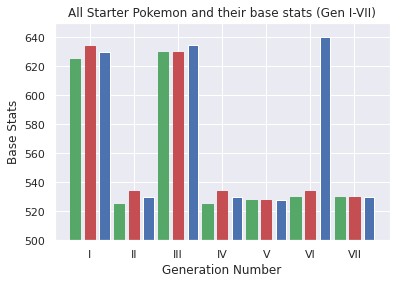

In [10]:
pokedex_num = df.pokedex_number 
pokedex_name = df.name 
base = df.base_stats 
pokedex_number = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21] #1-3 = Generation I, 4-6 = Generation II, 7-9 = Generation III, 10-12 = Generation IV, 13-15 = Generation V, 16-18 = Generation VI, 19-21 = Generation VII
generation_tick = [2, 5, 8, 11, 14, 17, 20]


generations = ('I', 'II', 'III', 'IV', 'V', 'VI', 'VII')

plt.ylim(500,650) 
barlist = plt.bar(pokedex_number, base, width=0.7)
plt.ylabel('Base Stats')
plt.xlabel('Generation Number')
plt.title('All Starter Pokemon and their base stats (Gen I-VII)')
plt.xticks(generation_tick, generations)

x = 0
list_of_lists = [ [0], [3], [6], [9], [12], [15], [18]]
for list in list_of_lists:
    for x in list:
        barlist[x].set_color('g')

list_of_lists = [ [1], [4], [7], [10], [13], [16], [19]]
for list in list_of_lists:
    for x in list:
        barlist[x].set_color('r')

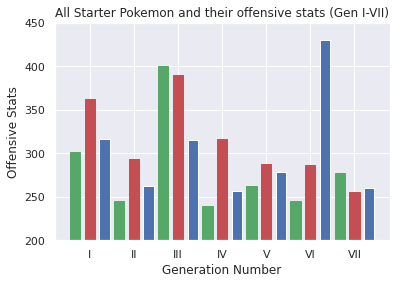

In [11]:
off = df.off_stats
defense = df.def_stats

barlist1 = plt.bar(pokedex_number, off, width=0.7) 
plt.ylim(200, 450)
plt.ylabel('Offensive Stats')
plt.title('All Starter Pokemon and their offensive stats (Gen I-VII)')
plt.xlabel('Generation Number')
plt.xticks(generation_tick, generations)

x = 0
list_of_lists = [ [0], [3], [6], [9], [12], [15], [18]]
for list in list_of_lists:
    for x in list:
        barlist1[x].set_color('g')

list_of_lists = [ [1], [4], [7], [10], [13], [16], [19]]
for list in list_of_lists:
    for x in list:
        barlist1[x].set_color('r')

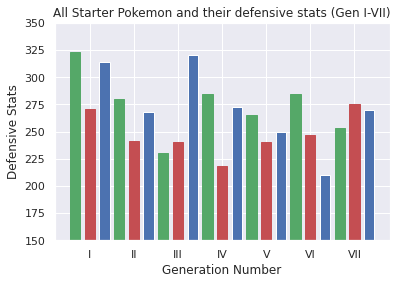

In [12]:
barlist2 = plt.bar(pokedex_number, defense, width=0.7) 
plt.ylim(150, 350)
plt.ylabel('Defensive Stats')
plt.title('All Starter Pokemon and their defensive stats (Gen I-VII)')
plt.xlabel('Generation Number')
plt.xticks(generation_tick, generations)

x = 0
list_of_lists = [ [0], [3], [6], [9], [12], [15], [18]]
for list in list_of_lists:
    for x in list:
        barlist2[x].set_color('g')

list_of_lists = [ [1], [4], [7], [10], [13], [16], [19]]
for list in list_of_lists:
    for x in list:
        barlist2[x].set_color('r')


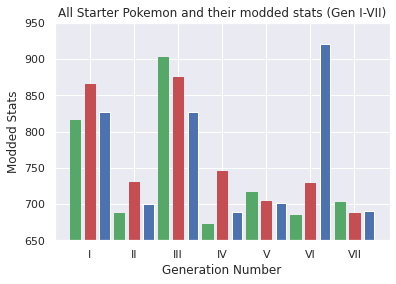

In [13]:
mod = df.mod_stats
plt.ylim(650,950) 
modlist = plt.bar(pokedex_number, mod, width=0.7) 
plt.ylabel('Modded Stats')
plt.xlabel('Generation Number')
plt.title('All Starter Pokemon and their modded stats (Gen I-VII)')
plt.xticks(generation_tick, generations)

x = 0
list_of_lists = [ [0], [3], [6], [9], [12], [15], [18]]
for list in list_of_lists:
    for x in list:
        modlist[x].set_color('g')

list_of_lists = [ [1], [4], [7], [10], [13], [16], [19]]
for list in list_of_lists:
    for x in list:
        modlist[x].set_color('r')

In [14]:
print('Highest Base Stats Starter Pokemon: \t \t'+ "\033[1m" + '{}'.format(df.name[df['base_stats'].idxmax()] ) + "\033[0;0m")
#print(legendaries['base_stats'].max())
print('Lowest Base Stats Starter Pokemon: \t \t'+ "\033[1m" + '{}'.format(df.name[df['base_stats'].idxmin()] ) + "\033[0;0m")
print('\n')

#Printing stat with tabs to format uniformly and added bold to better see pokemon name.
print('Highest HP Starter Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(df.name[df['hp'].idxmax()] ) + "\033[0;0m")
print('Lowest HP Starter Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(df.name[df['hp'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Attack Starter Pokemon: \t \t'+ "\033[1m" + '{}'.format(df.name[df['attack'].idxmax()] ) + "\033[0;0m")
print('Lowest Attack Starter Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(df.name[df['attack'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Special Attack Starter Pokemon: \t'+ "\033[1m" + '{}'.format(df.name[df['sp_attack'].idxmax()] ) + "\033[0;0m")
print('Lowest Special Attack Starter Pokemon: \t \t' + "\033[1m" + '{}'.format(df.name[df['sp_attack'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Defense Starter Pokemon: \t \t'+ "\033[1m" + '{}'.format(df.name[df['defense'].idxmax()] ) + "\033[0;0m")
print('Lowest Defense Starter Pokemon: \t \t'+ "\033[1m" + '{}'.format(df.name[df['defense'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Special Defense Starter Pokemon: \t'+ "\033[1m" + '{}'.format(df.name[df['sp_defense'].idxmax()] ) + "\033[0;0m")
print('Lowest Special Defense Starter Pokemon: \t'+ "\033[1m" + '{}'.format(df.name[df['sp_defense'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Fastest Starter Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(df.name[df['speed'].idxmax()] ) + "\033[0;0m")
print('Slowest Starter Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(df.name[df['speed'].idxmin()] ) + "\033[0;0m")
print('\n')

Highest Base Stats Starter Pokemon: 	 	Greninja
Lowest Base Stats Starter Pokemon: 	 	Meganium


Highest HP Starter Pokemon: 	 	 	Emboar
Lowest HP Starter Pokemon: 	 	 	Sceptile


Highest Attack Starter Pokemon: 	 	Blaziken
Lowest Attack Starter Pokemon: 	 	 	Delphox


Highest Special Attack Starter Pokemon: 	Charizard
Lowest Special Attack Starter Pokemon: 	 	Chesnaught


Highest Defense Starter Pokemon: 	 	Venusaur
Lowest Defense Starter Pokemon: 	 	Emboar


Highest Special Defense Starter Pokemon: 	Venusaur
Lowest Special Defense Starter Pokemon: 	Emboar


Fastest Starter Pokemon: 	 	 	Sceptile
Slowest Starter Pokemon: 	 	 	Torterra




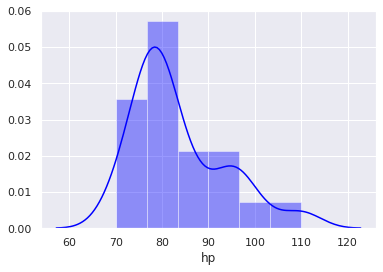

In [15]:
ax_hp = sns.distplot(df['hp'], color="blue")

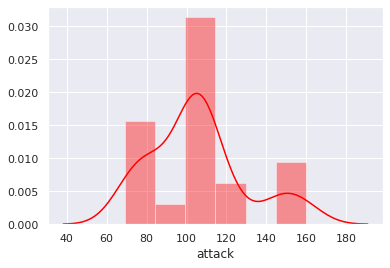

In [16]:
ax_attack = sns.distplot(df['attack'], color="red")

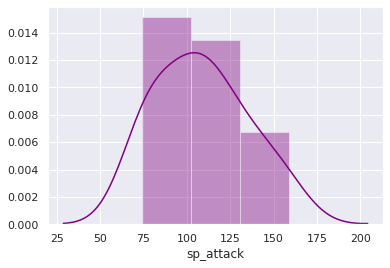

In [17]:
ax_spattack = sns.distplot(df['sp_attack'], color="purple")

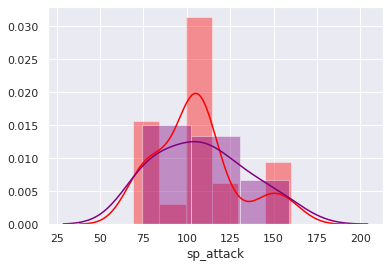

In [18]:
ax_attack = sns.distplot(df['attack'], color="red")
ax_spattack = sns.distplot(df['sp_attack'], color="purple")

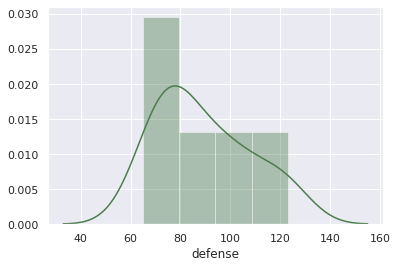

In [19]:
ax_defense = sns.distplot(df['defense'], color="#4b7d4b")

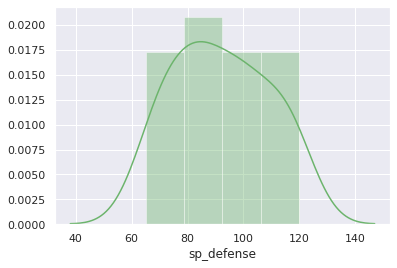

In [20]:
ax_spdefense = sns.distplot(df['sp_defense'], color="#6cb46c")

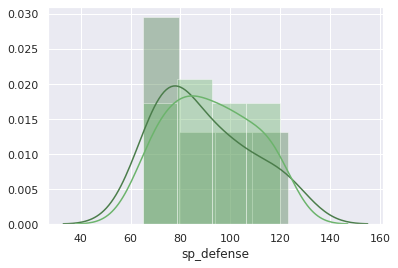

In [21]:
ax_defense = sns.distplot(df['defense'], color="#4b7d4b")
ax_spdefense = sns.distplot(df['sp_defense'], color="#6cb46c")

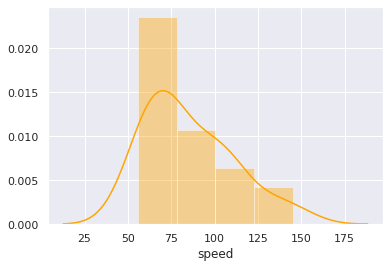

In [22]:
ax_speed = sns.distplot(df['speed'], color="orange")

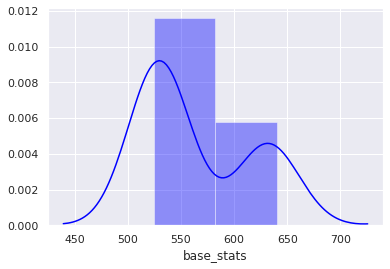

In [23]:
ax_base = sns.distplot(df['base_stats'], color="blue")

#### Starter Weakness

This started as a test to try examining Pokemon's weaknesses in a dataset so I started with the 21 starter Pokemon to analyze what was the most common weakness they had.

We start off by defining 'cols' which will be the different columns of weakness values we get, which will total to 18 different weakness types. Then those 18 types are shown to have the value of 0, 0.25, 0.5, 1, 2, and 4 (the higher being worse as it means it amplifies the damage that Pokemon takes from a certain type). Then below that it prints out what is the weakness that most Starter Pokemon are weak to, which is flying moves. Then it creates 18 graphs for the 18 different types of weaknesses and if you scroll to the 'against_flying' graph, it appears to have the highest weakness rating because there is no '0' value and there is a '4' value. So flying moves will hit all starter Pokemon and deal 4 times the normal amount of damage to some of them!

0 and 4 are values that throw off the weakness rating drastically because not being able to be hit by a move and taking 4 times normal damage are both extremes in shifting data one way or the other. This weakness measurement system will be similar to the one below when we analyze all Pokemon so I will not explain it as much below.

Many times what we use we reiterate for different sections just with a different lens to analyze different parts of the data.

In [24]:
cols = df.columns
against_ = []
for col in cols:
    if ('against_' in str(col)):
        against_.append(col)
        
print(len(against_)) 
print(against_)

18
['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


In [25]:
del list 

unique_elem = []
for col in against_:
    unique_elem.append(df[col].unique().tolist())
    
result = set(x for l in unique_elem for x in l)

result = list(result)
print(result)

[0.25, 1.0, 2.0, 0.5, 0.0, 4.0]


In [26]:
for col in against_:
    if (np.mean(df[col]) > 1.2):
        print(col)

for col in against_:
    if (np.sum(df[col]) > 1000):
        print(col)

against_flying


against_bug
[1.   0.25 2.   0.5 ]


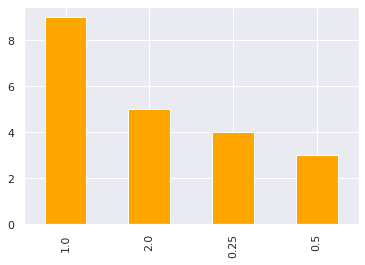

against_dark
[1.  0.5 2. ]


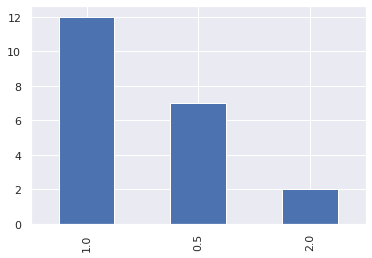

against_dragon
[1.  0.5 0. ]


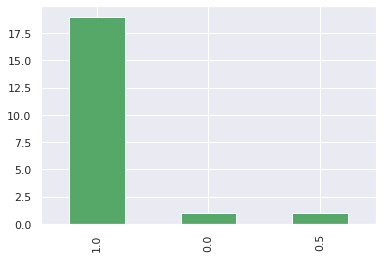

against_electric
[0.5 2.  1.  0. ]


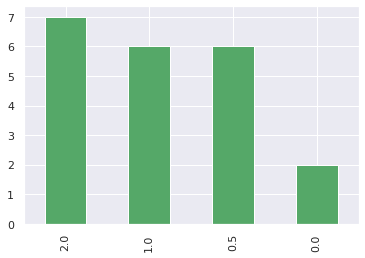

against_fairy
[0.5 1.  2. ]


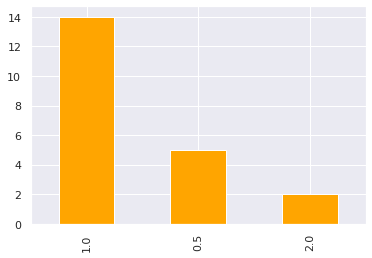

against_fight
[0.5 1.  2.  0. ]


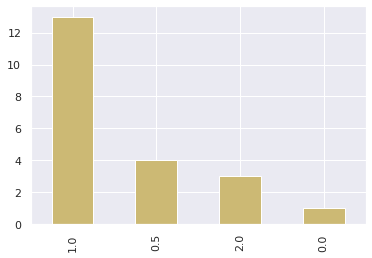

against_fire
[2.  0.5 1. ]


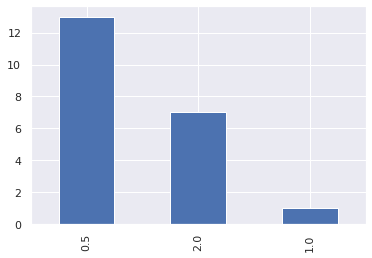

against_flying
[2.  1.  0.5 4. ]


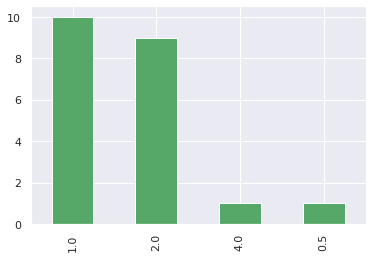

against_ghost
[1.  2.  0.5]


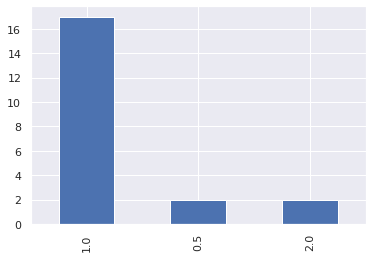

against_grass
[0.25 2.   0.5  4.   1.  ]


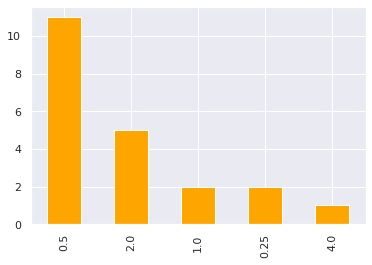

against_ground
[1.  0.  0.5 2. ]


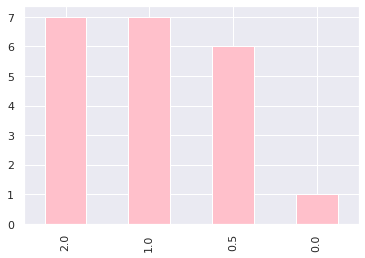

against_ice
[2.   1.   0.5  4.   0.25]


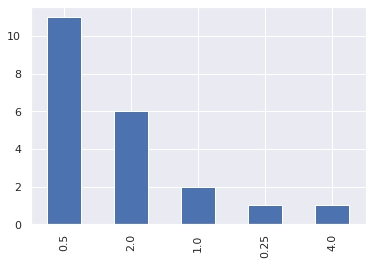

against_normal
[1.  0.5 0. ]


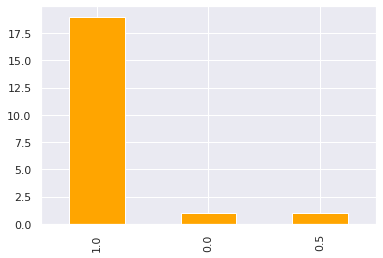

against_poison
[1.  2.  0.5 0. ]


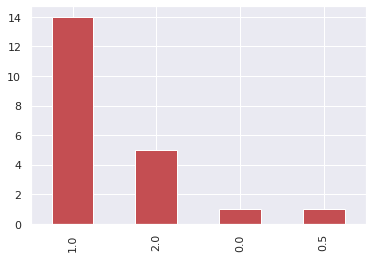

against_psychic
[2.  1.  0.5 0. ]


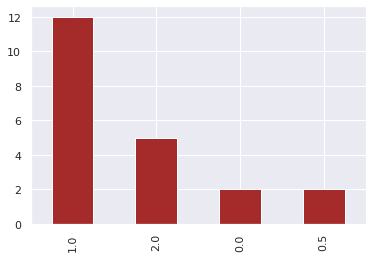

against_rock
[1.  4.  2.  0.5]


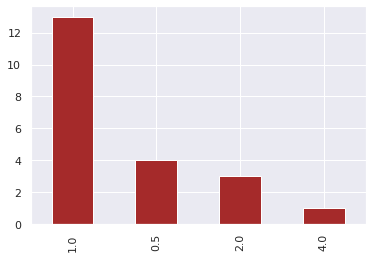

against_steel
[1.   0.5  0.25]


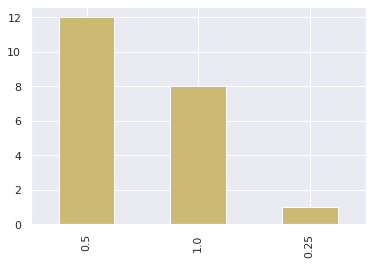

against_water
[0.5 2.  1. ]


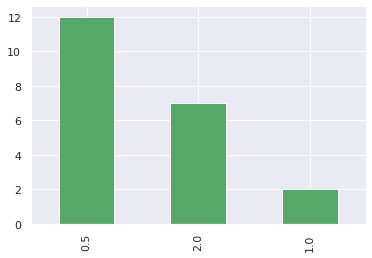

In [27]:
import random

for col in range(0, len(against_)):
    print (against_[col])
    print (df[against_[col]].unique())
    pp = pd.value_counts(df[against_[col]])
    
    color = ['g', 'b', 'r', 'y', 'pink', 'orange', 'brown']
            
    pp.plot.bar(color = random.choice(color))
    plt.show()

Text(0.5, 1.0, 'All Starter Pokemon and their secondary type (Gen I-VII)')

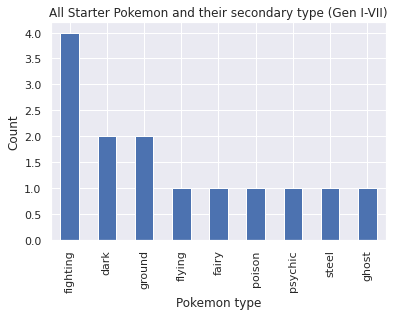

In [28]:
t2list = df['type2'].value_counts().plot.bar()

plt.ylabel('Count') 
plt.xlabel('Pokemon type')
plt.title('All Starter Pokemon and their secondary type (Gen I-VII)')

Text(0.5, 1.0, 'Distribution of Secondary Pokemon type')

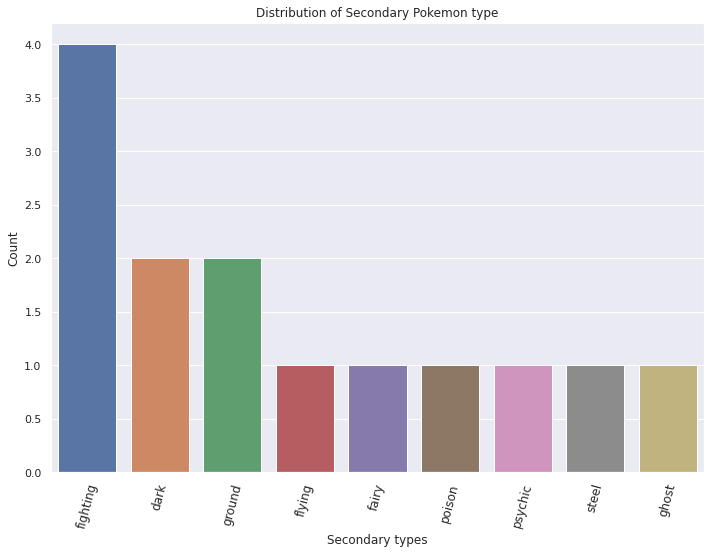

In [29]:
t2 = pd.value_counts(df['type2'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=t2.index, y=t2, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Secondary types', ylabel='Count')
ax.set_title('Distribution of Secondary Pokemon type')

In [30]:
print(df.describe())

       against_bug  against_dark  against_dragon  against_electric  \
count    21.000000     21.000000       21.000000         21.000000   
mean      1.023810      0.928571        0.928571          1.095238   
std       0.631985      0.426782        0.239046          0.717967   
min       0.250000      0.500000        0.000000          0.000000   
25%       0.500000      0.500000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          2.000000   
max       2.000000      2.000000        1.000000          2.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count      21.000000           21.0     21.000000       21.000000   
mean        0.976190            1.0      1.023810        1.547619   
std         0.402374            0.5      0.715475        0.773058   
min         0.500000            0.0      0.500000        0.500000   
25%         1.000000    

Single Types
384

Dual Types
417


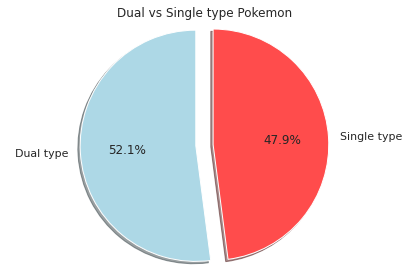

In [31]:
single_types = []
dual_types = []

count = 0
for i in data.index:
    if(pd.isnull(data.type2[i]) == True):
        count += 1
        single_types.append(data.name[i])
    else:
        dual_types.append(data.name[i])
print('Single Types')
print(len(single_types))
print('\nDual Types')
print(len(dual_types))

data = [417, 384]
colors = ['lightblue', '#ff4c4c']

# Create a pie chart
plt.pie(data, 
        labels= ['Dual type', 'Single type'], 
        shadow=True, 
        colors=colors, 
        explode=(0, 0.15), 
        startangle=90, 
        autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')
plt.title('Dual vs Single type Pokemon')
# View the plot
plt.tight_layout()
plt.show()

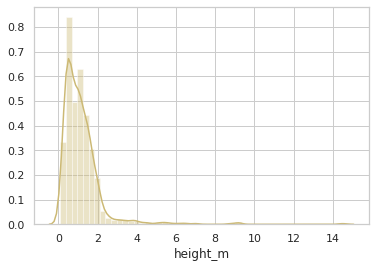

In [32]:
ax_height = sns.distplot(all_data['height_m'], color="y")

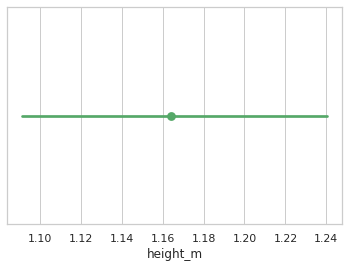

In [33]:
ax = sns.pointplot(all_data['height_m'], color = 'g')

In [34]:
all_data.base_total.corr(all_data.weight_kg)

0.45811070153899575

In [35]:
all_data.base_total.corr(all_data.height_m)

0.5350631000683103

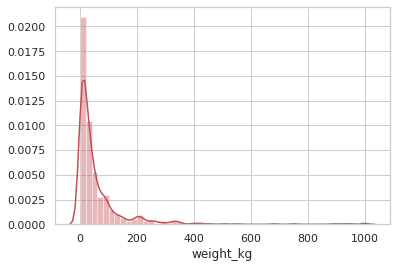

In [36]:
ax_weight = sns.distplot(all_data['weight_kg'], color="r")

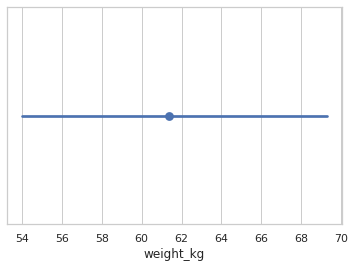

In [37]:
ax = sns.pointplot(all_data['weight_kg'])

In [38]:
data = pd.read_csv(path1)

In [39]:
for col in against_:
    if (np.mean(data[col]) > 1.2):
        print(col)

for col in against_:
    if (np.sum(data[col]) > 1000):
        print(col)  

against_ice
against_rock
against_rock


against_bug
[1.   0.5  0.25 2.   4.  ]


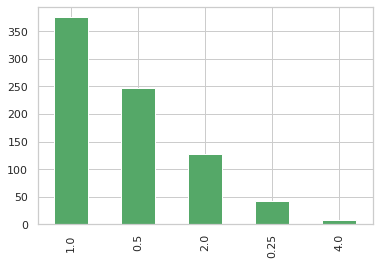

against_dark
[1.   0.5  2.   0.25 4.  ]


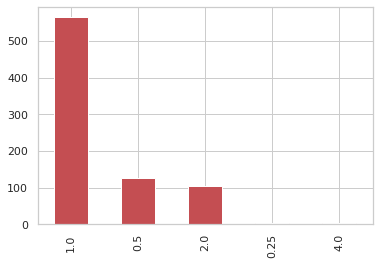

against_dragon
[1.  0.  0.5 2. ]


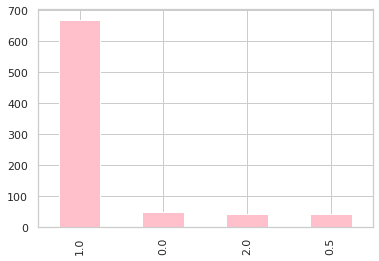

against_electric
[0.5  1.   2.   0.   4.   0.25]


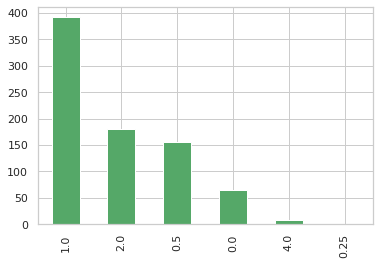

against_fairy
[0.5  1.   2.   0.25 4.  ]


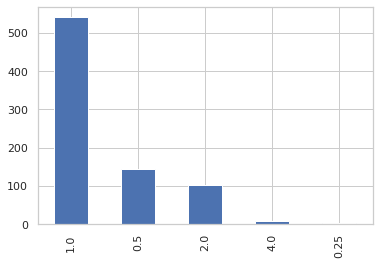

against_fight
[0.5  1.   0.25 2.   0.   4.  ]


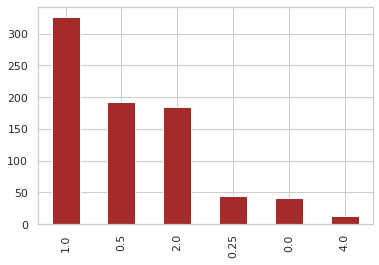

against_fire
[2.   0.5  1.   4.   0.25]


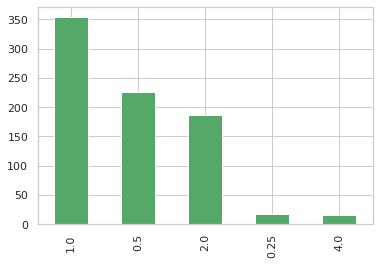

against_flying
[2.   1.   0.5  4.   0.25]


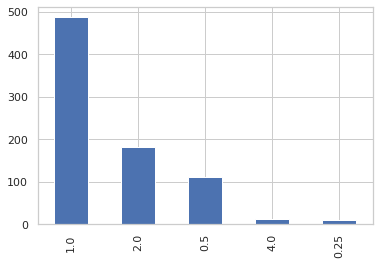

against_ghost
[1.  0.  2.  0.5 4. ]


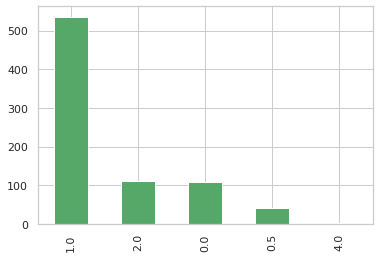

against_grass
[0.25 0.5  2.   1.   4.  ]


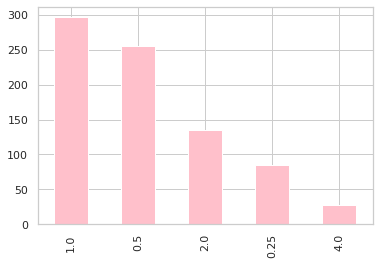

against_ground
[1.   2.   0.   0.5  0.25 4.  ]


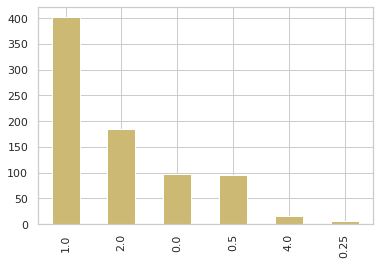

against_ice
[2.   0.5  1.   0.25 4.  ]


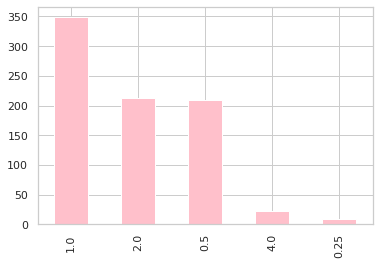

against_normal
[1.   0.5  0.   0.25]


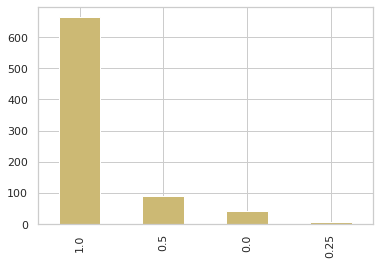

against_poison
[1.   0.5  0.25 2.   0.   4.  ]


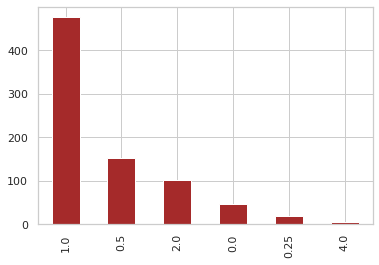

against_psychic
[2.   1.   0.5  0.   0.25 4.  ]


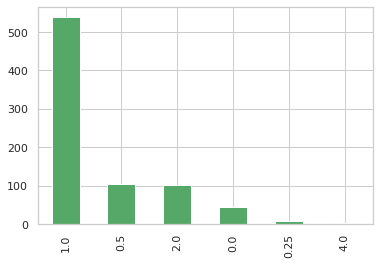

against_rock
[1.   2.   4.   0.5  0.25]


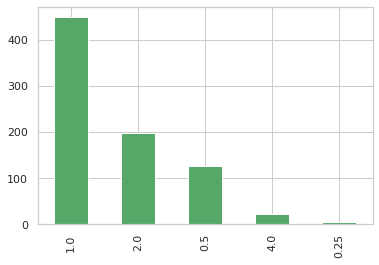

against_steel
[1.   0.5  2.   0.25 4.  ]


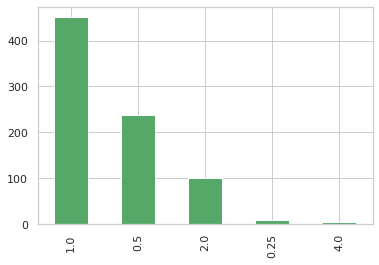

against_water
[0.5  2.   1.   4.   0.25]


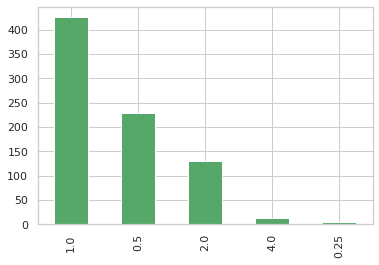

In [40]:
import random

for col in range(0, len(against_)):
    print (against_[col])
    print (data[against_[col]].unique())
    pp = pd.value_counts(data[against_[col]])
    
    color = ['g', 'b', 'r', 'y', 'pink', 'orange', 'brown']
            
    pp.plot.bar(color = random.choice(color))
    plt.show()


Text(0.5, 1.0, 'Distribution of capture_rate against number of Pokemon')

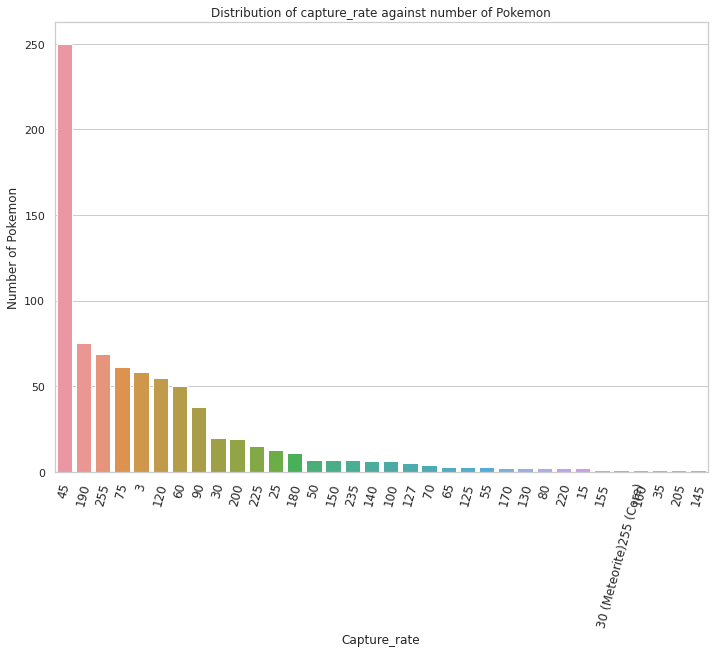

In [41]:
yy = pd.value_counts(all_data['capture_rate'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=all_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Capture_rate', ylabel='Number of Pokemon')
ax.set_title('Distribution of capture_rate against number of Pokemon')

Text(0.5, 1.0, 'Distribution of Base Happiness against number of Pokemon')

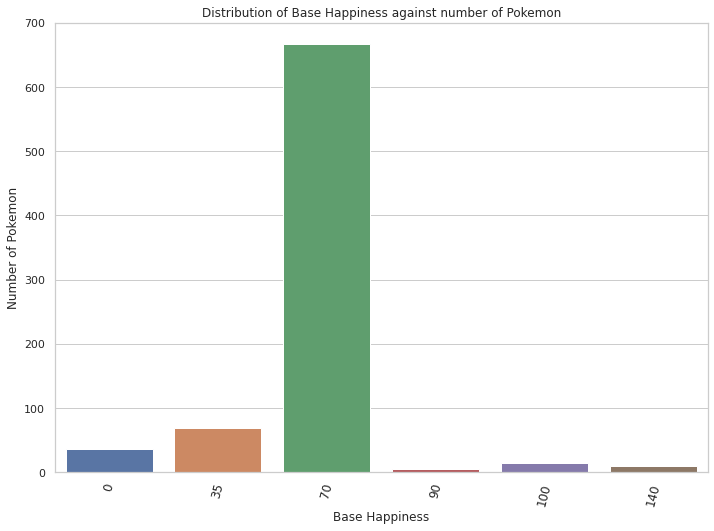

In [42]:
yy = pd.value_counts(all_data['base_happiness'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=all_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Base Happiness', ylabel='Number of Pokemon')
ax.set_title('Distribution of Base Happiness against number of Pokemon')

Text(0.5, 1.0, 'Distribution of Primary Pokemon type')

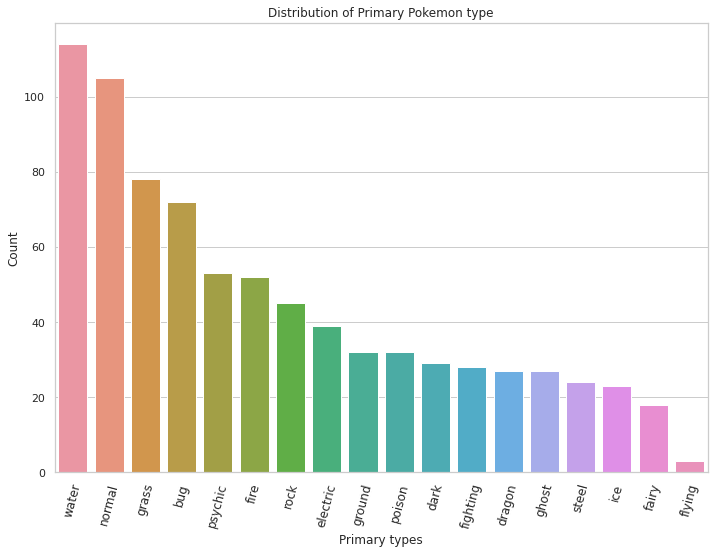

In [43]:
yy = pd.value_counts(data['type1'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Primary types', ylabel='Count')
ax.set_title('Distribution of Primary Pokemon type')

Text(0.5, 1.0, 'Distribution of Secondary Pokemon type')

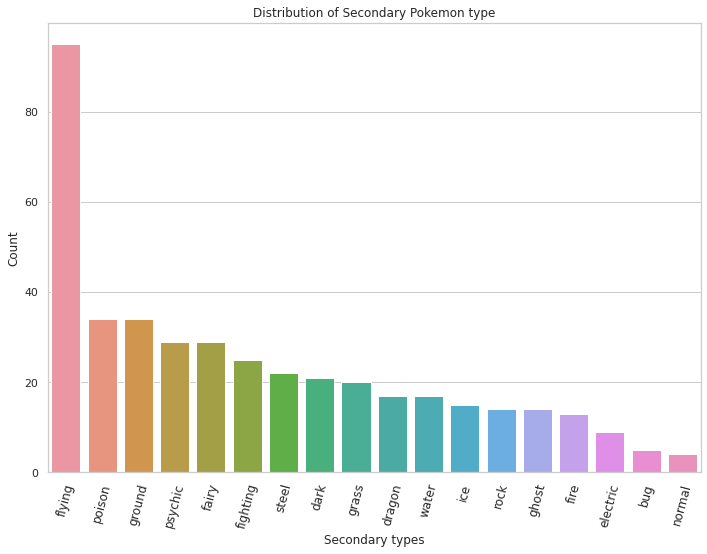

In [44]:
yy = pd.value_counts(data['type2'])

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("whitegrid")

ax = sns.barplot(x=yy.index, y=yy, data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontsize = 12)
ax.set(xlabel='Secondary types', ylabel='Count')
ax.set_title('Distribution of Secondary Pokemon type')


In [45]:
#Printing stat with tabs to format uniformly and added bold to better see pokemon name.
print('Highest HP Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(data.name[data['hp'].idxmax()] ) + "\033[0;0m")
print('Lowest HP Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(data.name[data['hp'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Attack Pokemon: \t \t'+ "\033[1m" + '{}'.format(data.name[data['attack'].idxmax()] ) + "\033[0;0m")
print('Lowest Attack Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(data.name[data['attack'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Special Attack Pokemon: \t'+ "\033[1m" + '{}'.format(data.name[data['sp_attack'].idxmax()] ) + "\033[0;0m")
print('Lowest Special Attack Pokemon: \t \t' + "\033[1m" + '{}'.format(data.name[data['sp_attack'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Defense Pokemon: \t \t'+ "\033[1m" + '{}'.format(data.name[data['defense'].idxmax()] ) + "\033[0;0m")
print('Lowest Defense Pokemon: \t \t'+ "\033[1m" + '{}'.format(data.name[data['defense'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Highest Special Defense Pokemon: \t'+ "\033[1m" + '{}'.format(data.name[data['sp_defense'].idxmax()] ) + "\033[0;0m")
print('Lowest Special Defense Pokemon: \t'+ "\033[1m" + '{}'.format(data.name[data['sp_defense'].idxmin()] ) + "\033[0;0m")
print('\n')

print('Fastest Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(data.name[data['speed'].idxmax()] ) + "\033[0;0m")
print('Slowest Pokemon: \t \t \t'+ "\033[1m" + '{}'.format(data.name[data['speed'].idxmin()] ) + "\033[0;0m")
print('\n')

Highest HP Pokemon: 	 	 	Blissey
Lowest HP Pokemon: 	 	 	Shedinja


Highest Attack Pokemon: 	 	Heracross
Lowest Attack Pokemon: 	 	 	Chansey


Highest Special Attack Pokemon: 	Mewtwo
Lowest Special Attack Pokemon: 	 	Sandshrew


Highest Defense Pokemon: 	 	Steelix
Lowest Defense Pokemon: 	 	Chansey


Highest Special Defense Pokemon: 	Shuckle
Lowest Special Defense Pokemon: 	Caterpie


Fastest Pokemon: 	 	 	Deoxys
Slowest Pokemon: 	 	 	Shuckle




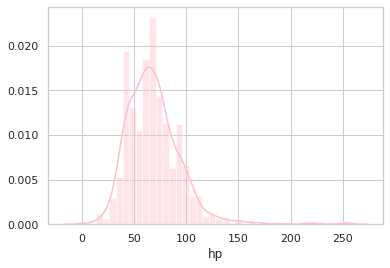

In [46]:
ax_hp = sns.distplot(data['hp'], color="pink")

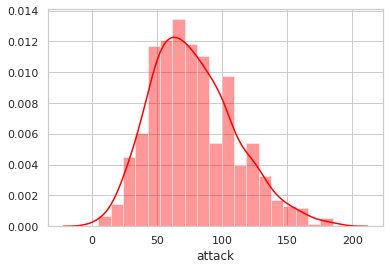

In [47]:
ax_attack = sns.distplot(data['attack'], color="red")

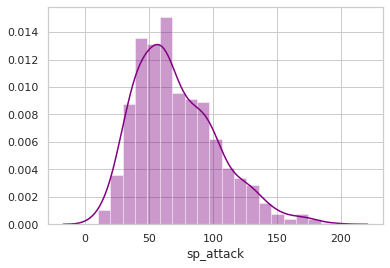

In [48]:
ax_spattack = sns.distplot(data['sp_attack'], color="purple")

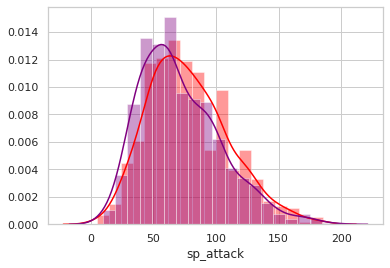

In [49]:
ax_attack = sns.distplot(data['attack'], color="red")
ax_spattack = sns.distplot(data['sp_attack'], color="purple")

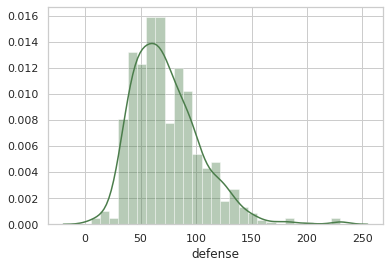

In [50]:
ax_defense = sns.distplot(data['defense'], color="#4b7d4b")

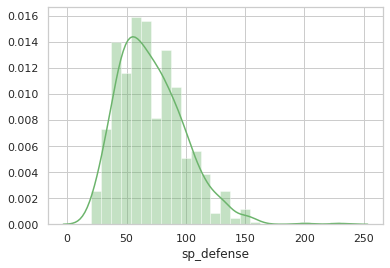

In [51]:
ax_spdefense = sns.distplot(data['sp_defense'], color="#6cb46c")

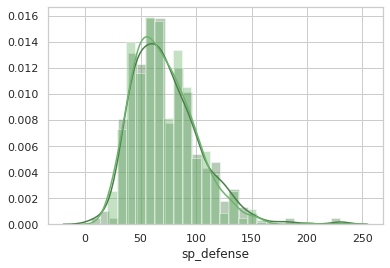

In [52]:
ax_defense = sns.distplot(data['defense'], color="#4b7d4b")
ax_spdefense = sns.distplot(data['sp_defense'], color="#6cb46c")

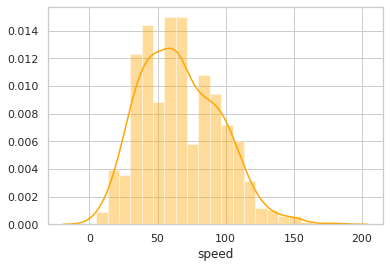

In [53]:
ax_speed = sns.distplot(data['speed'], color="orange")

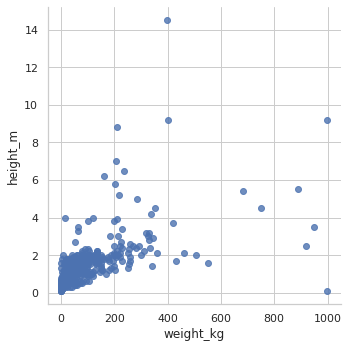

In [54]:
sns.lmplot( x="weight_kg", y="height_m", data=all_data, fit_reg=False)

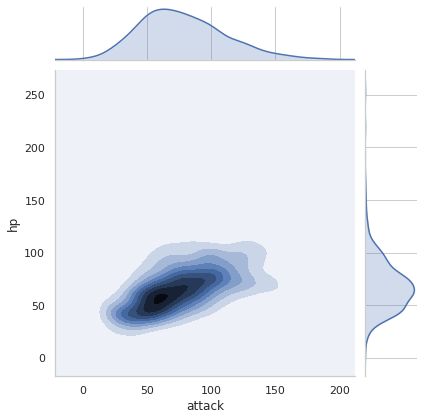

In [56]:
g = sns.jointplot("attack", "hp", data=data, kind="kde")

The Search for the Top 6 Pokemon Team: The code below aims to find the top 6 Pokemon team in each of the 7 Pokemon regions. We first begin by reading in our Pokemon dataset into a data frame. We then add base stats, weakness count, mod stats, and mod stats weakness columns to the data frame. A while loop is then used in order to filter the Pokemon by region, remove legendaries, handle null values, and create a weakness rating system. Once the while loop is done our data is now clean and we can begin to analyze the top 6 pokemon in every region. In order to determine the best pokemon team, we first look at the base stats which are a combination of attack, defence, hp, special attack, and special defence. While looking at the base stats, we discovered that pokemon weaknesses and important stats are not taken into considiration. In order to address this issue, we create a mod base stats column which give speed, attack and special attack a multiplier of 1.5-2. We also implement a weakness rating system using affine transfomation and if a Pokemon happens to have a weakness greater than 2, then we decrease the mod base stats depending on the amount of weaknesses a Pokemon has. After we have the mod base stats set, we sort the generation data frames and find the top 6 Pokemon in each region. We found that our mod base stats had a dramatic impact in finding the top 6 Pokemon because it only takes into account Pokemon who have low weaknesses and high attack/speed. Furthermore, our findings show that 6 Pokemon team in each region is diverse in terms of type and that two of the strongest Pokemon come from generation three. Finally, our top 6 Pokemon team from all generations only include Pokemon from generation one, three, four, five, and seven.

In [58]:
update_data['weakness_count'] =  update_data['against_flying'] + update_data['against_ghost'] + update_data['against_ground'] + update_data['against_grass'] + update_data['against_ice'] + update_data['against_normal'] + update_data['against_poison'] + update_data['against_psychic'] +  update_data['against_rock'] + update_data['against_steel'] + update_data['against_water'] + update_data['against_bug'] + update_data['against_fire'] + update_data['against_dragon'] +  update_data['against_dark'] + update_data['against_electric'] + update_data['against_fairy'] + update_data['against_fight']

update_data['base_stats'] = update_data['attack'] + update_data['defense'] + update_data['hp'] + update_data['sp_attack'] + update_data['sp_defense'] + update_data['speed']
update_data['mod_stats'] = (update_data['attack'] * 1.5) + update_data['defense'] + update_data['hp'] + (update_data['sp_attack'] * 1.5) + update_data['sp_defense'] + (update_data['speed'] * 2)
update_data['mod_stats_weakness'] = (update_data['attack'] * 1.5) + update_data['defense'] + update_data['hp'] + (update_data['sp_attack'] * 1.5) + update_data['sp_defense'] + (update_data['speed'] * 2)
update_data = update_data.replace(np.nan,' ',regex=True)

pokemon_list = []
generation_list = []
i = 0
gen_count = 1
max_weakness = update_data['weakness_count'].max();
min_weakness = update_data['weakness_count'].min();

while i < len(update_data):
    if  update_data['name'][i] is not None:
        if update_data['generation'][i] == gen_count:
            if update_data['is_legendary'][i] == 0:
                weakness_count = (update_data['weakness_count'][i] - min_weakness) * (10 - 1)/ (max_weakness - min_weakness) + 1
                base_weakness = update_data['mod_stats_weakness'][i]
                big_impact = 10
                small_impact = 5
                
                # Check for weaknesses and reduce base stats if weakness is > 2
                if update_data['against_bug'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_bug'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_dark'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_dark'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_dragon'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_dragon'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_electric'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_electric'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_fairy'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_fairy'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_fight'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_fight'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_flying'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_flying'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_ghost'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_ghost'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_grass'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_grass'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_ground'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_ground'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_ice'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_ice'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_rock'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_rock'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_normal'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_normal'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_psychic'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_psychic'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_poison'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_poison'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_steel'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_steel'][i] == 2:
                    base_weakness -= small_impact
                if update_data['against_water'][i] == 4: 
                    base_weakness -= big_impact
                elif update_data['against_water'][i] == 2:
                    base_weakness -= small_impact
                pokemon = {'name': update_data['name'][i], 'base stats': update_data['base_stats'][i], 'weakness rating': round(weakness_count, 1), 'type': str(update_data['type1'][i]) +" "+ str(update_data['type2'][i]), 'mod stats': update_data['mod_stats'][i],'true base stats': base_weakness, 'special attack': update_data['sp_attack'][i], 'attack': update_data['attack'][i]}
                generation_list.append(pokemon)
            
            if i == 800:
                tmp_pokemon_list = pd.DataFrame(generation_list)
                pokemon_list.append(tmp_pokemon_list)
                generation_list = []
        else:
            tmp_pokemon_list = pd.DataFrame(generation_list)
            pokemon_list.append(tmp_pokemon_list)
            generation_list = []
            gen_count +=1  
            i -=1
    i += 1

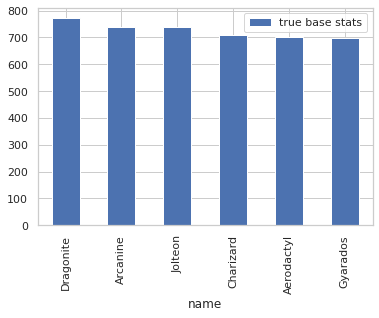

In [59]:
generation_1 = pokemon_list[0].sort_values(by=['true base stats'], ascending = False)
generation_1 = generation_1.drop([100]) #Drop Electrode 
generation_1
generation_1.loc[:129].plot.bar(y='true base stats', x='name')
finalists = pd.DataFrame(columns=generation_1.columns)
finalists = finalists.append(generation_1.loc[:129])

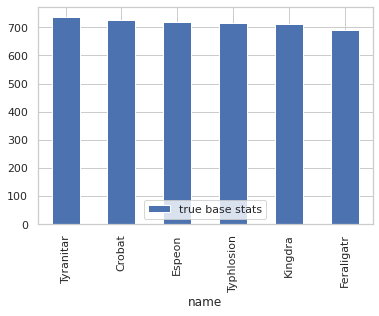

In [60]:
generation_2 = pokemon_list[1].sort_values(by=['true base stats'], ascending = False)
generation_2
generation_2.loc[:8].plot.bar(y='true base stats', x='name')
finalists = finalists.append(generation_2.loc[:8])

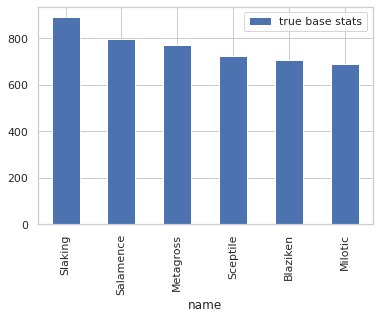

In [62]:
generation_3 = pokemon_list[2].sort_values(by=['true base stats'], ascending = False)
generation_3
generation_3.loc[:98].plot.bar(y='true base stats', x='name')
finalists = finalists.append(generation_3.loc[:98])

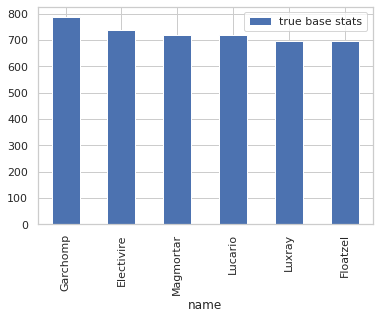

In [63]:
generation_4 = pokemon_list[3].sort_values(by=['true base stats'], ascending = False)
# Drop pokemon who do not make the cut
generation_4 = generation_4.drop([87,73,5]) 
generation_4
generation_4.loc[:32].plot.bar(y='true base stats', x='name')
finalists = finalists.append(generation_4.loc[:32])

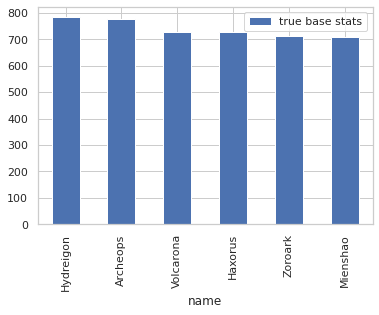

In [64]:
generation_5 = pokemon_list[4].sort_values(by=['true base stats'], ascending = False)
# Drop pokemon who do not make the cut
generation_5 = generation_5.drop([122]) 
generation_5
generation_5.loc[:125].plot.bar(y='true base stats', x='name')
finalists = finalists.append(generation_5.loc[:125])

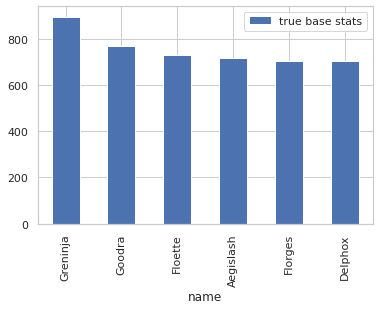

In [65]:
generation_6 = pokemon_list[5].sort_values(by=['true base stats'], ascending = False)
# Drop pokemon who do not make the cut
generation_6 = generation_6.drop([65]) 
generation_6
generation_6.loc[:5].plot.bar(y='true base stats', x='name')
finalists = finalists.append(generation_6.loc[:5])

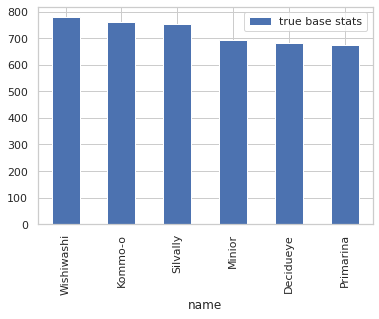

In [66]:
generation_7 = pokemon_list[6].sort_values(by=['true base stats'], ascending = False)
# Drop pokemon who do not make the cut
generation_7 = generation_7.drop([50]) 
generation_7
generation_7.loc[:8].plot.bar(y='true base stats', x='name')
finalists = finalists.append(generation_7.loc[:8])